In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#loading data set
df=pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#checking missing values of the data
df.isnull().sum()
df.info()
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Hello\AppData\Local\Temp\ipykernel_19036\1997798117.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\Hello\AppData\Local\Temp\ipykernel_19036\1997798117.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447


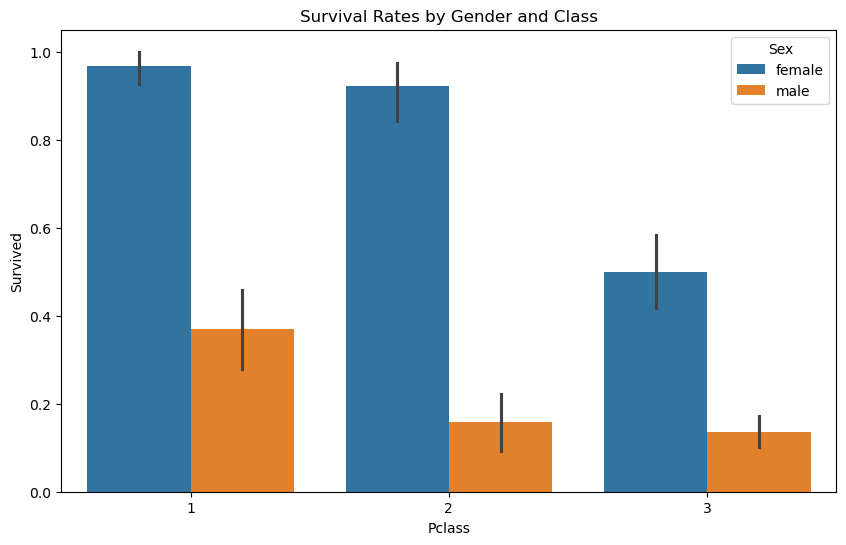

In [10]:
# 1 gender and class combination survival rates
gender_class_survival=df.pivot_table('Survived',['Pclass','Sex'])
print(gender_class_survival)

plt.figure(figsize=(10,6))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df)
plt.title('Survival Rates by Gender and Class')
plt.show()


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


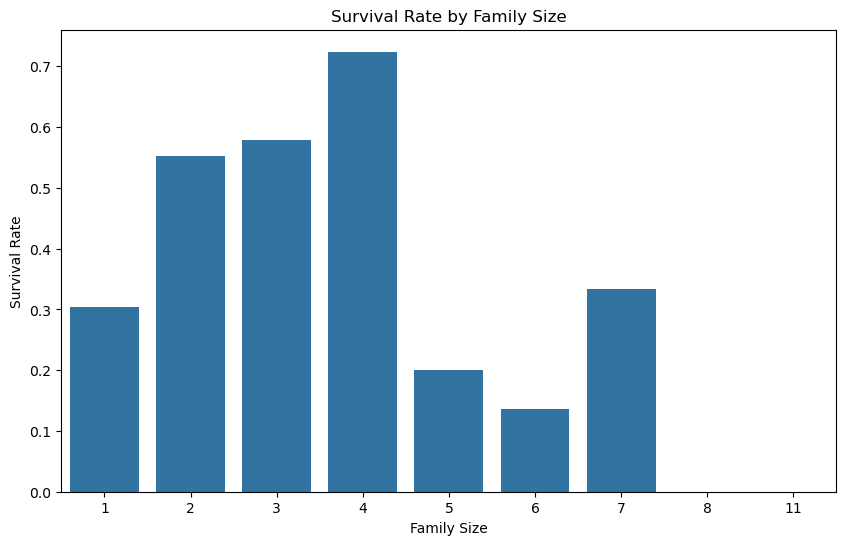

In [13]:
# 2 survival chance witha alone and family
df['FamilySize']=df['SibSp']+df['Parch']+1
family_survival=df.groupby('FamilySize')['Survived'].mean()
print(family_survival)

#visulization
plt.figure(figsize=(10,6))
sns.barplot(x=family_survival.index,y=family_survival.values)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


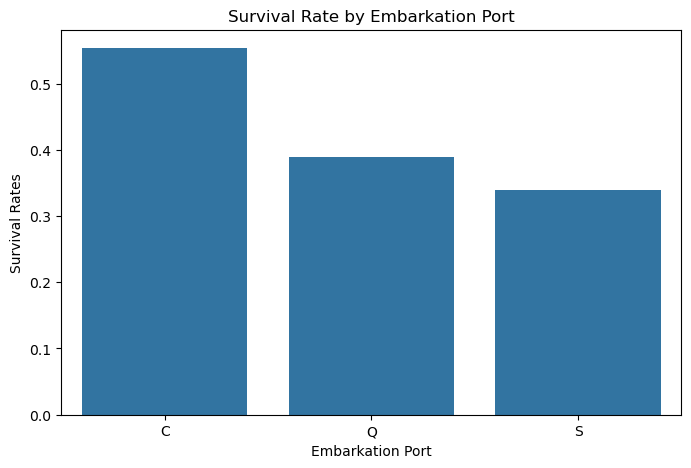

In [16]:
# 3.survival rates based on embarkation port
embarked_survival=df.groupby('Embarked')['Survived'].mean()
print(embarked_survival)

#plotting
plt.figure(figsize=(8,5))
sns.barplot(x=embarked_survival.index,y=embarked_survival.values)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rates')
plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_19036\1565688854.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival=df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
0-12     0.579710
13-18    0.428571
19-30    0.331096
31-40    0.445161
41-60    0.390625
61-80    0.227273
80+           NaN
Name: Survived, dtype: float64


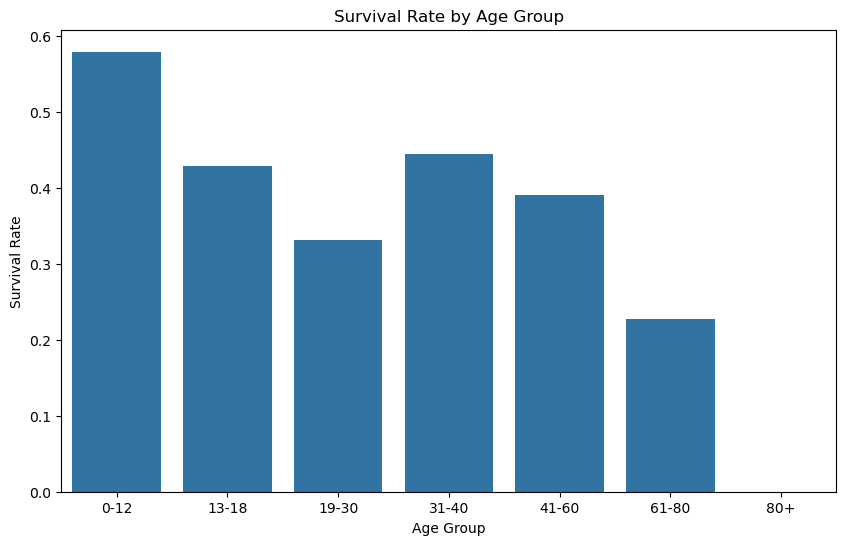

In [18]:
#hidden patterbs
bins=[0,12,18,30,40,60,80,100]
labels=['0-12','13-18','19-30','31-40','41-60','61-80','80+']
df['AgeGroup']=pd.cut(df['Age'],bins,labels=labels)

#grouping by age and caluclating the survival rate
age_survival=df.groupby('AgeGroup')['Survived'].mean()
print(age_survival)

#plotting
plt.figure(figsize=(10,6))
sns.barplot(x=age_survival.index,y=age_survival.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()